## **Sample notebook for MNIST**

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
img_rows, img_cols = 28, 28


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Have a look at the dimensions and print out a random image

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


0


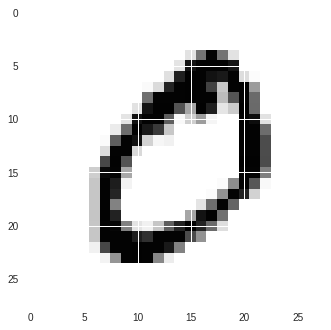

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
print(y_train[1])

### Reshape the data to be in line with what is expected by Keras

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [17]:
print(x_train[0].dtype)

uint8


### **Convert the classes to binary categories**

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Define a model

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

### Train the model

In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 194s 3ms/step - loss: 0.2162 - acc: 0.9377 - val_loss: 0.0744 - val_acc: 0.9771
Epoch 2/12
60000/60000 [==============================] - 194s 3ms/step - loss: 0.1105 - acc: 0.9685 - val_loss: 0.0490 - val_acc: 0.9843
Epoch 3/12
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0841 - acc: 0.9755 - val_loss: 0.0512 - val_acc: 0.9840
Epoch 4/12
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0675 - acc: 0.9796 - val_loss: 0.0436 - val_acc: 0.9860
Epoch 5/12
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0582 - acc: 0.9829 - val_loss: 0.0443 - val_acc: 0.9869
Epoch 6/12
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0523 - acc: 0.9845 - val_loss: 0.0402 - val_acc: 0.9882
Epoch 7/12
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0456 - acc: 0.9860 - val_loss: 0.0378 - 

###summarize history for accuracy

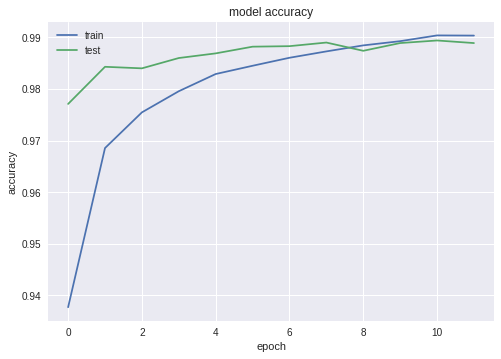

In [23]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###**bold text** summarize history for loss

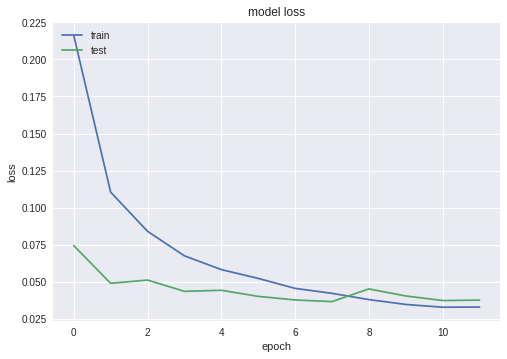

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03767545551183721
Test accuracy: 0.9889


In [0]:
# Add section for inference